## Krikey Coding Challenge
Rahil Shah 

Questions: 
- What attributes have the most variability
- Which classes of users are the most commmon
- What feeds is the most active

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')


from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
feeds = pd.read_csv("feeds.csv", sep = ",")
users = pd.read_csv("users.csv", sep = ",")
videos = pd.read_csv("videos.csv", sep = ",")
watchedVideo = pd.read_csv("watchedVideo.csv", sep = ",")

#data cleaning
users['userId'] = users['id']
users.drop(columns=['id'],inplace=True)

videos['videoId'] = videos['id']
videos.drop(columns=['id'],inplace=True)

feeds['feedId'] = feeds['id']
feeds.drop(columns=['id'],inplace=True)

print(users.head())

print(users['class'].value_counts())

print(videos['num_shares'].value_counts())

print(videos['is_ar'].value_counts())

#print(feeds.head())
#print(users.head())
#print(videos.head())
#print(watchedVideo.head())


#print(watchedVideo.head())
# 5 different classes of users
# 10 feeds
# 5000 videos, 992 creators, max 20 shares
# 2 os 

   Unnamed: 0           created_at        class                coordinates  \
0           0  2021-03-23 00:24:53      Creator    ('36.76775', '2.95924')   
1           1  2021-04-09 19:55:07       Viewer   ('43.71032', '-1.05366')   
2           2  2021-04-08 21:48:45  Super Gamer       ('51.26', '-2.1875')   
3           3  2021-05-15 00:45:51      Creator  ('40.65538', '-74.38987')   
4           4  2021-07-05 04:08:53       Viewer  ('35.61452', '-88.81395')   

                                 userId  
0  37e369a8-4477-4d5d-acd7-4e3b8059586e  
1  27cf0bb6-3488-4662-916d-3ad04eeec9ca  
2  5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4  
3  30986592-0cbf-43bb-83ed-7501ab3bd373  
4  25b49125-34d1-4694-a4a9-8415bcc3567b  
Gamer            213
Super Gamer      209
Super Creator    206
Creator          186
Viewer           186
Name: class, dtype: int64
2     273
12    267
14    260
5     257
4     254
6     254
15    244
8     244
17    241
7     236
3     236
1     233
9     232
18    232
13    23

In [3]:
#Checking for null values
print("FEEDS NULL ITEMS")
print(feeds.isnull().sum())

print("\nUSERS NULL ITEMS")
print(users.isnull().sum())

print("\nVIDEOS NULL ITEMS")
print(videos.isnull().sum())

print("\nWATCHED VIDEOS NULL ITEMS")
print(watchedVideo.isnull().sum())

FEEDS NULL ITEMS
Unnamed: 0    0
name          0
feedId        0
dtype: int64

USERS NULL ITEMS
Unnamed: 0     0
created_at     0
class          0
coordinates    0
userId         0
dtype: int64

VIDEOS NULL ITEMS
Unnamed: 0      0
attribute_id    0
music_id        0
animation_id    0
duration        0
creator         0
created_at      0
num_shares      0
game_id         0
is_ar           0
videoId         0
dtype: int64

WATCHED VIDEOS NULL ITEMS
Unnamed: 0     0
coordinates    0
os             0
duration       0
videoId        0
userId         0
appVersion     0
dateTime       0
feedId         0
dtype: int64


Android    25037
iOS        24963
Name: os, dtype: int64


<AxesSubplot:xlabel='OS'>

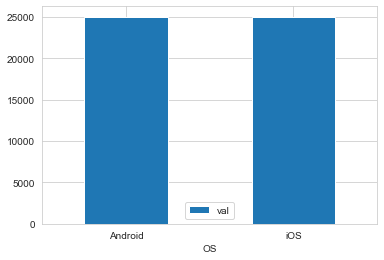

In [4]:
#Checking the proportion of Android vs iOS users
print(watchedVideo['os'].value_counts())
df = pd.DataFrame({'OS':['Android','iOS'], 'val':[25037, 24963]})
df.plot.bar(x='OS', y='val', rot=0)



In [6]:
# Creating new data frame to connect user id across watchedVideo and users
# Connecting feedID between watched video and feeds
# Connecting video ID from watched video with creator id from videos

user_watchedVid = pd.DataFrame()
user_watchedVid = pd.merge(watchedVideo,users, how='inner', on='userId')
#print(new_df.head())
user_watchedVid.groupby('class', as_index=False)['duration'].mean()

vid_df = pd.DataFrame()
vid_df = pd.merge(user_watchedVid,videos, how='inner', on='videoId')
#print(vid_df.head())
print("most used app version")
print(vid_df['appVersion'].value_counts())
print("\n")
#vid_df.groupby('videoId', as_index=False)['attribute_id'].mean()
 
        
print("finding what music used the most")
print(videos['music_id'].value_counts())
print("\n")

print("most active creators")
print(videos['creator'].value_counts())
print("\n")

#videos.plot.bar(x='music_id', y='num_shares', rot=0)
#plt.show()


print("feeds have the most videos")
feed_watchedVid = pd.merge(watchedVideo['feedId'],feeds, how='inner', on='feedId')

print(feed_watchedVid['name'].value_counts())
print("\n")


most used app version
2.1.2    5134
3.0.0    5086
2.2.3    5070
2.1.0    4978
2.2.4    4967
2.2.2    4965
3.0.1    4961
2.2.1    4960
2.1.1    4951
2.2.0    4928
Name: appVersion, dtype: int64


finding what music used the most
c3721b09-6896-465a-8e13-4d73efd06874    550
b5b679a5-e769-4d95-82a6-f75e439b1ef9    548
19e4db13-d854-4913-a8ca-3612ee1a6071    512
8ff50feb-3b5d-4dd0-84b0-8409753bd166    509
da2fc9b0-32d5-4a1b-8b40-2706eb133bf0    491
3de11516-8627-47c3-98ab-265b429cac91    488
d53234f4-1efb-4299-97c1-11658118cba5    481
4ee0de5b-e27f-4d73-a3c6-52cf26e36c54    475
e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292    474
1f80192e-3bff-41b8-b272-7062b9d7b6de    472
Name: music_id, dtype: int64


most active creators
ddfeab0f-274a-4cab-86c2-873cbd8e485e    12
b86d3272-a6a0-449c-8d04-caa5fbd9260a    12
fe96fb46-1629-4e5c-8a4c-d244146726c4    12
9e75f24f-cce5-404c-afd7-80abf6bee06c    11
ce66818b-eedd-41e4-9178-72b8f9f0199e    11
                                        ..
65144b4e-dffa-4ec9-a58

<p>
<span style="color:blue">
The most active creators ids are listed as such: 
<li>ddfeab0f-274a-4cab-86c2-873cbd8e485e  </li>   
<li>b86d3272-a6a0-449c-8d04-caa5fbd9260a  </li> 
<li>fe96fb46-1629-4e5c-8a4c-d244146726c4   </li>  
 <li>9e75f24f-cce5-404c-afd7-80abf6bee06c     </li>
 <li> ce66818b-eedd-41e4-9178-72b8f9f0199e  </li>
   
</span>
</p>